In [ ]:
# !pip install numpy matplotlib
# !pip install scikit-learn

In [2]:
# A1, A3
import dtree
import monkdata as m
import numpy as np
import matplotlib.pyplot as plt

print("Entropy: ")

print(dtree.entropy(m.monk1))
print(dtree.entropy(m.monk1test))
print(dtree.entropy(m.monk2))
print(dtree.entropy(m.monk2test))
print(dtree.entropy(m.monk3))
print(dtree.entropy(m.monk3test))
print()

datasets = [m.monk1, m.monk2, m.monk3]

print("Info Gain: ")
for dataset in datasets:
    for i in range(6):
        print(str(round(dtree.averageGain(dataset, m.attributes[i]),6)) + " & ", end="")
    print()

Entropy: 
1.0
1.0
0.957117428264771
0.9135964672699597
0.9998061328047111
0.9977724720899821

Info Gain: 
0.075273 & 0.005838 & 0.004708 & 0.026312 & 0.287031 & 0.000758 & 
0.003756 & 0.002458 & 0.001056 & 0.015664 & 0.017277 & 0.006248 & 
0.007121 & 0.293736 & 0.000831 & 0.002892 & 0.255912 & 0.007077 & 


In [6]:
# A0, A5
import monkdata as m
import dtree as d

tree_monk1 = d.buildTree(m.monk1, m.attributes)
train_acc_monk1 = d.check(tree_monk1, m.monk1)
test_acc_monk1 = d.check(tree_monk1, m.monk1test)

tree_monk2 = d.buildTree(m.monk2, m.attributes)
train_acc_monk2 = d.check(tree_monk2, m.monk2)
test_acc_monk2 = d.check(tree_monk2, m.monk2test)

tree_monk3 = d.buildTree(m.monk3, m.attributes)
train_acc_monk3 = d.check(tree_monk3, m.monk3)
test_acc_monk3 = d.check(tree_monk3, m.monk3test)

print("Dataset   | Training Accuracy | Testing Accuracy")
print("-----------------------------------------------")
print(f"MONK-1    | {train_acc_monk1:<17.2f}| {test_acc_monk1:<15.2f}")
print(f"MONK-2    | {train_acc_monk2:<17.2f}| {test_acc_monk2:<15.2f}")
print(f"MONK-3    | {train_acc_monk3:<17.2f}| {test_acc_monk3:<15.2f}")

Dataset   | Training Accuracy | Testing Accuracy
-----------------------------------------------
MONK-1    | 1.00             | 0.83           
MONK-2    | 1.00             | 0.69           
MONK-3    | 1.00             | 0.94           


In [7]:
import monkdata as m
from dtree import buildTree
import drawtree_qt5
 

tree_1 = buildTree(m.monk1, m.attributes)
drawtree_qt5.drawTree(tree_1)

SystemExit: 0

D:\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [8]:
import monkdata as m
from dtree import buildTree
import drawtree_qt5
 
tree_2 = buildTree(m.monk2, m.attributes)
drawtree_qt5.drawTree(tree_2)

SystemExit: 0

In [3]:
import monkdata as m
from dtree import buildTree
import drawtree_qt5
tree_3 = buildTree(m.monk3, m.attributes)
drawtree_qt5.drawTree(tree_3)

SystemExit: 0

# Assignment 7

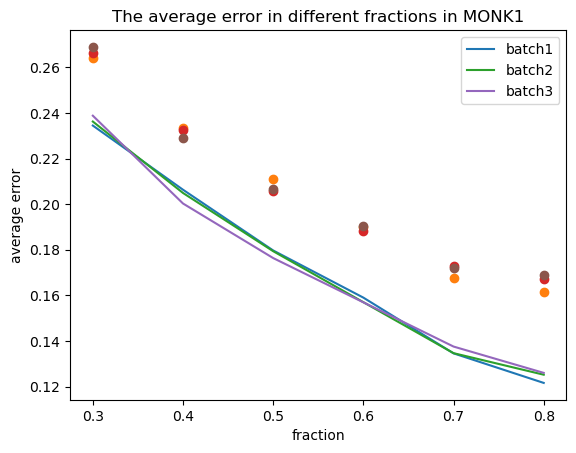

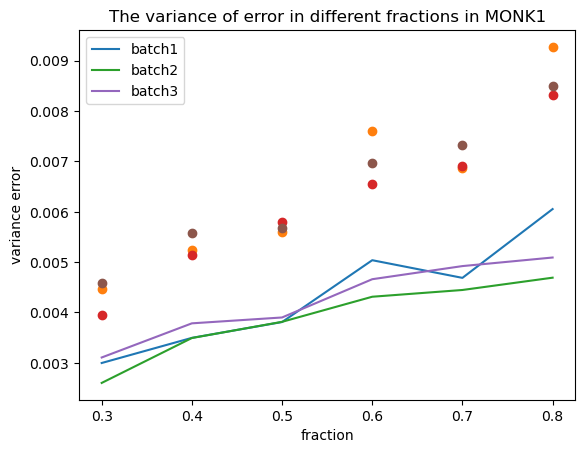

In [ ]:
import random
import numpy as np
import monkdata as m
import dtree as dt
import drawtree_qt5
import matplotlib.pyplot as plt


fraction_list = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
epochs = 300

def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata) # shuffle data randomly
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]
# monk1train, monk1val = partition(m.monk3, 0.6)

def search_best_prun_during_epochs(dataset, fraction):
    err_list = []
    err_ori_list = []
    for i in range(epochs):
        monk1train, monk1val = partition(dataset, fraction)
        orig_tree = dt.buildTree(monk1train, m.attributes)
        
        # print(orig_tree)
        prun_list = dt.allPruned(orig_tree)
        
        best_tree = orig_tree
        max_acc = dt.check(orig_tree, monk1val)
        err_ori = 1 - max_acc
        err_ori_list.append(err_ori)
        #print(max_acc)
        
        for tree in prun_list:
            acc = dt.check(tree, monk1val)
            if (acc > max_acc):
                max_acc = acc
                best_tree = tree
        
        # print(best_tree)
        # print(max_acc)
        err = 1 - max_acc
        err_list.append(err)
    #print(np.mean(err_list))
    #print(np.var(err_list))
    return np.mean(err_list), np.var(err_list), np.mean(err_ori_list), np.var(err_ori_list)

for i in range(3):
    mean_array = []
    var_array = []
    mean_ori_array = []
    for fraction in fraction_list:
        mean, var, mean_ori, var_ori = search_best_prun_during_epochs(m.monk1, fraction)
        mean_array.append(mean)
        var_array.append(var)
        mean_ori_array.append(mean_ori)
    
    plt.plot(fraction_list, mean_array, label="batch"+str(i+1))
    plt.plot(fraction_list, mean_ori_array, marker='o', linestyle='none')
plt.xlabel("fraction")
plt.ylabel("average error")
plt.legend()
plt.title("The average error in different fractions in MONK1")
plt.savefig("mean1.jpg")
plt.show()

for i in range(3):
    mean_array = []
    var_array = []
    var_ori_array = []
    for fraction in fraction_list:
        mean, var, mean_ori, var_ori = search_best_prun_during_epochs(m.monk1, fraction)
        mean_array.append(mean)
        var_array.append(var)
        var_ori_array.append(var_ori)
    
    plt.plot(fraction_list, var_array, label="batch"+str(i+1))
    plt.plot(fraction_list, var_ori_array, marker='o', linestyle='none')
plt.xlabel("fraction")
plt.ylabel("variance error")
plt.legend()
plt.title("The variance of error in different fractions in MONK1")
plt.savefig("var1.jpg")
plt.show()

for i in range(3):
    mean_array = []
    var_array = []
    mean_ori_array = []
    for fraction in fraction_list:
        mean, var, mean_ori, var_ori = search_best_prun_during_epochs(m.monk3, fraction)
        mean_array.append(mean)
        var_array.append(var)
        mean_ori_array.append(mean_ori)
    
    plt.plot(fraction_list, mean_array, label="batch"+str(i+1))
    plt.plot(fraction_list, mean_ori_array, marker='o', linestyle='none')
plt.xlabel("fraction")
plt.ylabel("average error")
plt.legend()
plt.title("The average error in different fractions in MONK3")
plt.savefig("mean2.jpg")
plt.show()

for i in range(3):
    mean_array = []
    var_array = []
    var_ori_array = []
    for fraction in fraction_list:
        mean, var, mean_ori, var_ori = search_best_prun_during_epochs(m.monk3, fraction)
        mean_array.append(mean)
        var_array.append(var)
        var_ori_array.append(var_ori)
    
    plt.plot(fraction_list, var_array, label="batch"+str(i+1))
    plt.plot(fraction_list, var_ori_array, marker='o', linestyle='none')
plt.xlabel("fraction")
plt.ylabel("variance error")
plt.legend()
plt.title("The variance of error in different fractions in MONK3")
plt.savefig("var2.jpg")
plt.show()